In [1]:
import util
from forward import solve_forward
from simulation import Simulation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# to load large .mat files
import mat73
import random
from net import EEG_CNN

2021-12-14 00:04:13.990197: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-14 00:04:13.990219: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Train the CNN

In [2]:
eeg_topos = mat73.loadmat('/media/thanos/Big Data/Thanos/TUC/Thesis/sim_data/sim_type_1/eeg_topographies.mat')['eeg_arr']
eeg_topos = eeg_topos.transpose(2, 0, 1)

Text(0.5, 1.0, 'Topography for eeg signal: 27733')

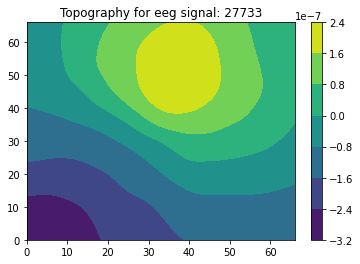

In [3]:
topo_idx = random.randint(0,eeg_topos.shape[0]-1)
topo = eeg_topos[topo_idx,:,:]
plt.contourf(topo, cmap=cm.get_cmap('viridis'))
cbar = plt.colorbar()
plt.draw()
plt.title('Topography for eeg signal: {}'.format(topo_idx+1))

In [4]:
# load previous simulation
sim = util.load_object('/media/thanos/Big Data/Thanos/TUC/Thesis/sim_data/sim_type_1/sim_obj_100k.pkl')
# fwd = solve_forward()
# sim = Simulation(fwd=fwd)
# sim.simulate(n_samples=100)

In [5]:
eegcnn = EEG_CNN(sim=sim, eeg_topographies=eeg_topos)

In [ ]:
eegcnn.build_model()

In [ ]:
eegcnn.fit(patience=35)

In [ ]:
eegcnn.save_nn('/media/thanos/Big Data/Thanos/TUC/Thesis/nn_trained/cnn_model_3.h5')

### Evaluate the CNN

In [ ]:
eegcnn.load_nn('/media/thanos/Big Data/Thanos/TUC/Thesis/nn_trained/cnn_model_3.h5')

In [ ]:
eeg_topos_eval = mat73.loadmat('/media/thanos/Big Data/Thanos/TUC/Thesis/sim_data/sim_type_2/eeg_big_sim_1_topos_type_2.mat')['eeg_arr']
eeg_topos_eval = eeg_topos_eval.transpose(2, 0, 1)

sources_eval = np.load('/media/thanos/Big Data/Thanos/TUC/Thesis/sim_data/sim_type_2/sources_big_sim_1_type_2.npy')

In [ ]:
mse = eegcnn.evaluate_mse(eeg=eeg_topos_eval,sources=sources_eval)
nmse = eegcnn.evaluate_nmse(eeg=eeg_topos_eval, sources=sources_eval)

print('Normilized MSE:', np.mean(nmse))
print('MSE:', np.mean(mse))